##**Mapa provincial sobre la inflación**
Este cuaderno tiene como objetivo mostrar en un mapa la inflación de las distintas provincias de España. En concreto, este ejemplo muestra los datos para [abril de 2022](https://www.ine.es/jaxiT3/Tabla.htm?t=50918&L=0), a través de las tablas que proporciona el INE.

Para seleccionar los datos que se utilizan en el ejemplo, seleccionamos: 
- En Provincias seleccionamos todas menos Nacional
- En Grupos ECOICOP selecionamos solo Índice general
- En Tipo de dato seleccionamos Variación anual
- En Periodo seleccionamos 2022M04

Se ha utilizado como documento base el cuaderno titulado [*Cómo dibujar mapas en Python I Mapas estáticos*](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Esquemas_Python/C%C3%B3mo%20dibujar%20mapas%20en%20Python%20I%20Mapas%20est%C3%A1ticos.ipynb), donde viene explicado como ir desarrollando un mapa estático. 

In [ ]:
# Cargamos la librerias que vamos a utilizar
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

Seleccionamos el archivo de datos descargado anteriormente, al que hemos llamado ***inflación***, que se trata de un archivo csv separado por ;

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving inflación.csv to inflación.csv


In [ ]:
datos=pd.read_csv("inflación.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
datos.head()

,Provincias,Tipo de dato,Grupos ECOICOP,Periodo,Total
0,02 Albacete,Variación anual,Índice general,2022M04,9.6
1,03 Alicante/Alacant,Variación anual,Índice general,2022M04,8.7
2,04 Almería,Variación anual,Índice general,2022M04,7.9
3,01 Araba/Álava,Variación anual,Índice general,2022M04,8.2
4,33 Asturias,Variación anual,Índice general,2022M04,8.3


In [ ]:
# Importamos datos geográficos que actualmente se encuentran en nuestro repositorio de GitHub
canarias = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias_provincias.zip?raw=true')
peninsula_baleares = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula_provincias.zip?raw=true')

Canarias_Acercadas = canarias
from shapely import affinity
Canarias_Acercadas["geometry"] = Canarias_Acercadas["geometry"].apply(affinity.translate, xoff=4.5, yoff=7) 

# Unimos los datos cartograficos
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, Canarias_Acercadas]))
mapa.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34084500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34084500000,Toledo,ES4,ES42,None,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,ES.IGN.BDDAE.34024400000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34024400000,Teruel,ES2,ES24,None,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,ES.IGN.BDDAE.34094300000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34094300000,Tarragona,ES5,ES51,None,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,ES.IGN.BDDAE.34074200000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34074200000,Soria,ES4,ES41,None,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,ES.IGN.BDDAE.34014100000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34014100000,Sevilla,ES6,ES61,None,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


In [ ]:
# Creamos una nueva columna que después añadiremos a nuestro DataFrame
mapa["Codigo"] = mapa["NATCODE"].str[4:6] # Para quedarnos con el código de la provincia
mapa[["NAMEUNIT", "NATCODE", "Codigo"]].head()

,NAMEUNIT,NATCODE,Codigo
0,Toledo,34084500000,45
1,Teruel,34024400000,44
2,Tarragona,34094300000,43
3,Soria,34074200000,42
4,Sevilla,34014100000,41


In [ ]:
# Cogemos el código de la provincia
datos["Codigo"] = datos["Provincias"].str[:2] 
# Cambiamos el nombre de la columna para especificar de qué estamos hablando
datos = datos.rename(columns={"Total": "Inflación"}) 
datos = datos[["Codigo", "Provincias", "Inflación"]]
# Unimos nuestros DataFrame con un merge
mapa_inflacion = pd.merge(mapa, datos)
mapa_inflacion = mapa_inflacion[["NAMEUNIT", "Codigo", "Inflación", "geometry"]] 
# Renombramos la columna "NAMEUNIT" por "Provincia"
mapa_inflacion = mapa_inflacion.rename(columns={"NAMEUNIT":"Provincia"}) 
mapa_inflacion.head()

,Provincia,Codigo,Inflación,geometry
0,Toledo,45,11.5,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,Teruel,44,9.7,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,Tarragona,43,8.9,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,Soria,42,9.2,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,Sevilla,41,8.3,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

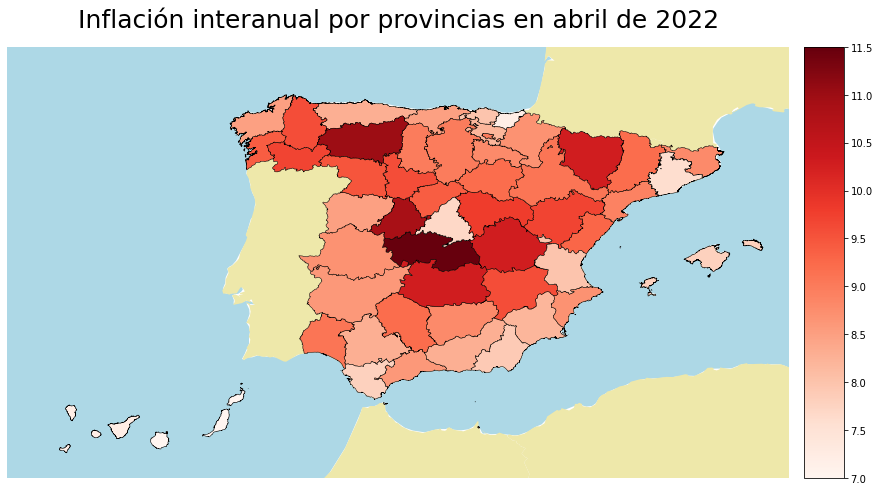

In [ ]:
# Creamos la figura y establecemos su tamaño
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
# Establecemos las coordenadas geográficas a cartografiar
ax.axis([-15, 5, 34, 45]) 
 
# Título 
ax.set_title("Inflación interanual por provincias en abril de 2022", 
             pad = 20, # Eleva el título, separándolo del contorno de la figura
             fontdict={"fontsize":25}) 

# Eliminar ejes
ax.set_axis_off()

# Añadimos la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                         size="5%",
                         pad=0.2) # Para separar la leyenda un poco del mapa

# Dibujamos nuestro mapa de provincias
mapa_inflacion.plot(ax=ax,
           column="Inflación",
           cmap="Reds", # Seleccionamos un Colormaps acorde a lo que queremos representar
           edgecolor="black",
           linewidth=0.5,
           legend=True,
           cax=cax,
           zorder=5); 

# Añadimos capa de mares al mapa
oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
mapa_oceanos.plot(ax=ax,
                 color="lightblue",
                 zorder=0);

# Añadimos capa de países
paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
mapa_paises.plot(ax=ax,
                 color="palegoldenrod",
                 linewidth=0,
                 zorder=2);

# Guardamos y nos descargamos el mapa en formato .png
plt.savefig("Mapa_Provincias_inflación.png")
from google.colab import files
files.download("Mapa_Provincias_inflación.png")

###**Comparación de mapas provinciales**
A continuación, vamos a mostrar los mapas provinciales de abril de 2022 y de abril de 2021, para poder comparar la situación de la inflación en esos momentos del tiempo. 

Para ello realizamos la misma selección de datos que anteriormente pero para abril de 2021, archivo al que hemos llamado ***inflación2021***.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving inflación2021.csv to inflación2021.csv


In [ ]:
datos2=pd.read_csv("inflación2021.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
datos2.head()

,Provincias,Tipo de dato,Grupos ECOICOP,Periodo,Total
0,02 Albacete,Variación anual,Índice general,2021M04,2.7
1,03 Alicante/Alacant,Variación anual,Índice general,2021M04,2.5
2,04 Almería,Variación anual,Índice general,2021M04,2.2
3,01 Araba/Álava,Variación anual,Índice general,2021M04,2.5
4,33 Asturias,Variación anual,Índice general,2021M04,2.5


In [ ]:
datos2["Codigo"] = datos2["Provincias"].str[:2]
datos2 = datos2.rename(columns={"Total": "Inflación"})
datos2 = datos2[["Codigo", "Provincias", "Inflación"]]

mapa_inflacion2 = pd.merge(mapa, datos2)
mapa_inflacion2 = mapa_inflacion2[["NAMEUNIT", "Codigo", "Inflación", "geometry"]] 
mapa_inflacion2 = mapa_inflacion2.rename(columns={"NAMEUNIT":"Provincia"}) 
mapa_inflacion2.head()

,Provincia,Codigo,Inflación,geometry
0,Toledo,45,2.8,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,Teruel,44,2.3,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,Tarragona,43,2.8,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,Soria,42,2.8,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,Sevilla,41,2.2,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

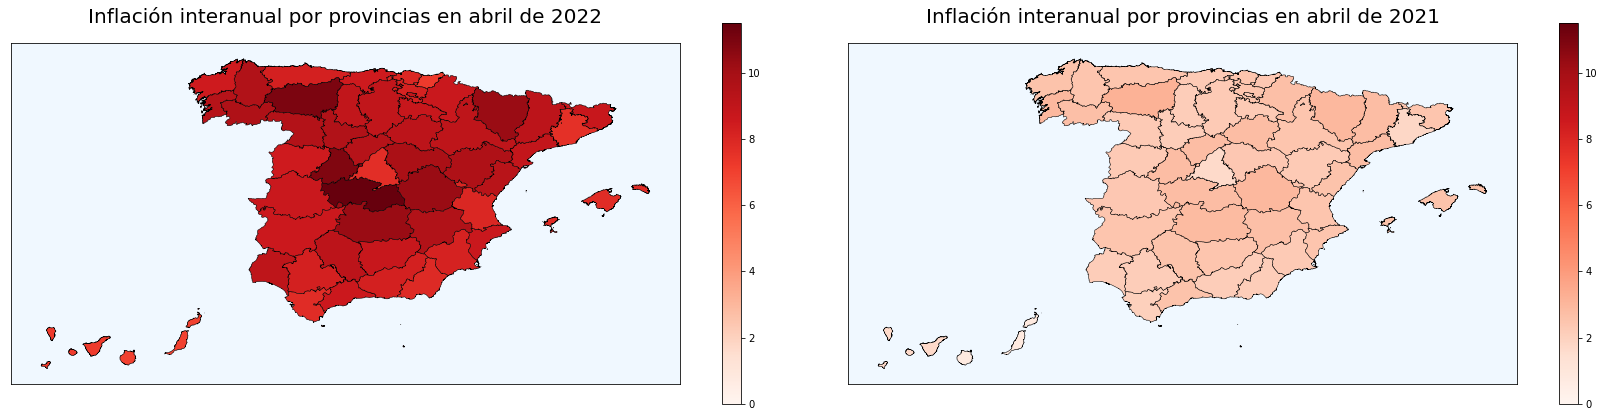

In [ ]:
# Creamos la figura, estableciendo que tendrá dos subfiguras al poner ax1 y ax2. 
fig, (ax1, ax2) = plt.subplots(nrows=1, # Número de filas
                              ncols=2, # Número de columnas
                              figsize=(30, 20)) # Tamaño de la figura

# Reducimos al máximo la separación entre las figuras
fig.subplots_adjust(wspace=0.0) 

# Creamos la primera figura (que irá a la izquierda):
ax1.set_xticks([]) # Quitamos los ticks del eje X
ax1.set_yticks([]) # Quitamos los ticks del eje Y
ax1.set_facecolor("aliceblue") # Establecemos un color de fondo
ax1.set_title("Inflación interanual por provincias en abril de 2022", 
              pad = 20, 
              fontdict={"fontsize":20}) # Tamaño de la fuente del título
# Creamos el primer mapa
mapa_inflacion.plot(ax=ax1, 
                column="Inflación",
                cmap="Reds",
                edgecolor="black",
                linewidth=0.5,
                legend=True,
                # Establecemos una leyenda
                legend_kwds={"orientation": "vertical", 
                             "shrink": 0.35}, # Para reducir el tamaño por defecto de la barra
                norm=plt.Normalize(vmin=0, vmax=11.5)) # Para ajustar los valores de la leyenda
# Creamos el segundo mapa
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_facecolor("aliceblue")
ax2.set_title("Inflación interanual por provincias en abril de 2021", 
             pad = 20,
             fontdict={"fontsize":20}) 

mapa_inflacion2.plot(ax=ax2,
                column="Inflación", 
                cmap="Reds", 
                edgecolor="black",
                linewidth=0.5,
                legend=True,
                legend_kwds={"orientation": "vertical",
                             "shrink": 0.35},
                norm=plt.Normalize(vmin=0, vmax=11.5));

# Guardamos y nos descargamos la figura en formato .png:
plt.savefig("Dos_Mapas_Provincias_inflación.png")
from google.colab import files
files.download("Dos_Mapas_Provincias_inflación.png")

###**Evolución media anual de la inflación en las provincias de España desde 2002 a 2021**
Cogemos los datos que nos proporciona el [INE](https://www.ine.es/jaxiT3/Tabla.htm?t=50944&L=0) desde el año 2002, archivo al que hemos llamado ***EvoInflación***, con ello representaremos un GIF con la evolución temporal de la inflación.

En el cuaderno [*¿Cómo dibujar mapas en Python II Mapas dinámicos.*](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Esquemas_Python/C%C3%B3mo%20dibujar%20mapas%20en%20Python%20II%20Mapas%20din%C3%A1micos.ipynb) viene detallado como representar un GIF.


In [ ]:
# Importamos dos librerias para la realización del GIF
import PIL
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
datos3=pd.read_csv("EvoInflación.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")

datos3["Codigo"] = datos3["Provincias"].str[:2]
datos3 = datos3.rename(columns={"Total": "Inflación"}) 
datos3 = datos3[["Codigo", "Provincias", "Periodo", "Inflación"]]
datos3.head()

Saving EvoInflación.csv to EvoInflación.csv


,Codigo,Provincias,Periodo,Inflación
0,02,02 Albacete,2021,3.4
1,02,02 Albacete,2020,-0.4
2,02,02 Albacete,2019,0.6
3,02,02 Albacete,2018,1.9
4,02,02 Albacete,2017,1.9


In [ ]:
# Creamos una columna para cada Periodo
datos_evolucion = datos3.pivot_table('Inflación', ['Codigo', 'Provincias'], 'Periodo')
datos_evolucion.reset_index( drop=False, inplace=True)
# Nos quedamos con las columnas más relevantes del dataframe con información geográfica
mapa_evolucion = mapa[["Codigo", "geometry"]] 
mapa_evolucion = pd.merge(mapa_evolucion, datos_evolucion) #Realizamos la unión, que se hará en base a las columnas Codigo
mapa_evolucion.head()

,Codigo,geometry,Provincias,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,45,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884...",45 Toledo,2.8,3.2,3.1,3.2,2.6,4.0,-1.6,...,2.4,1.5,-0.6,-1.1,-0.6,2.3,2.0,0.6,-0.6,3.9
1,44,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ...",44 Teruel,2.9,2.9,3.4,3.4,3.0,4.9,-0.7,...,2.3,1.3,-0.4,-0.8,-0.3,2.0,1.6,0.6,-0.4,3.1
2,43,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6...",43 Tarragona,2.6,2.7,3.2,3.4,2.9,3.8,-0.7,...,2.8,1.0,-0.4,-0.7,-0.4,2.2,1.9,0.4,-0.8,3.4
3,42,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646...",42 Soria,2.5,2.6,3.2,3.6,3.0,4.3,-0.4,...,2.4,1.2,-0.3,-0.8,-0.3,2.1,2.0,1.0,-0.6,3.7
4,41,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232...",41 Sevilla,2.8,3.0,3.3,3.5,2.9,4.0,-0.2,...,2.0,1.2,-0.3,-0.6,-0.1,1.7,1.6,0.5,-0.3,3.1


Creamos un bucle que va a iterar unas 10 veces, por lo que es un proceso que va a tardar unos 2 min en completarse. 

In [ ]:
# Creamos la lista de fotogramas vacía:
fotogramas = []

# Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa_evolucion.columns.to_list()[3:]:

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-15, 5, 34, 45]) 
 
    # Título y ejes:
    ax.set_title("Inflación media anual por provincias en " + str(fechas) + " (%)", 
                  pad = 20, 
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Longitud", fontsize=20)
    plt.xticks(fontsize=15)
    ax.set_ylabel("Latitud", fontsize=20)
    plt.yticks(fontsize=15)
    plt.grid(True, zorder=0)

    # Eliminar ejes
    ax.set_axis_off()

    # Leyenda
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) # Para separar la leyenda un poco del mapa

    # Dibujamos nuestro mapa de provincias:
    mapa_evolucion.plot(ax=ax,
               column=fechas,
               cmap="bwr",
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               norm=plt.Normalize(vmin=-4, vmax=4), 
               cax=cax,
               zorder=5); 

    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);
 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                   color="palegoldenrod",
                   edgecolor="black",
                   linewidth=0.2,
                   zorder=2); 
  
    # Creamos el GIF
    f = io.BytesIO() # Creamos un objeto que va a contener elementos binarios 
    imagen = ax.get_figure() # Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, # Guadamos la información de cada mapa
                   format="png", 
                   bbox_inches="tight") 
    f.seek(0) 
    fotogramas.append(PIL.Image.open(f)) # Con append() vamos añadiendo cada mapa a la lista de fotogramas.


fotogramas[0].save("Mapa evolución de la inflación por provincias.gif", 
                   format="GIF", 
                   append_images = fotogramas[1:], 
                   save_all = True,
                   duration = 1200, # Duración en milisegundos del GIF
                   loop=0) # Para que vuelva a mepezar el GIF

f.close() # Cerramos el archivo binario 

# Se mostraran todos los archivos png que hemos utilizado para formar el GIF, 
# como no los necesitamos, pulsamos en la parte izquierda y borramos los resultados mostrados (x)

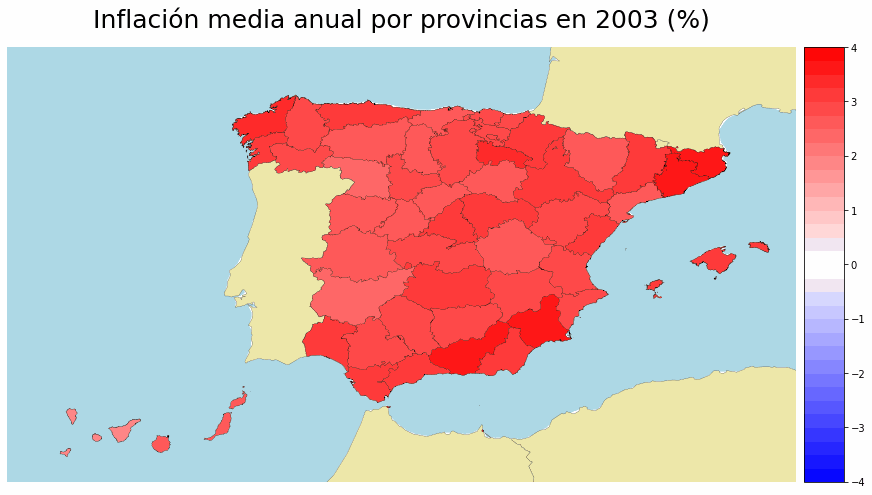

In [ ]:
# Leemos el GIF que hemos guardado previamente
from IPython.display import Image
from matplotlib import animation
Image(open("/content/Mapa evolución de la inflación por provincias.gif", "rb").read()) 

In [ ]:
# Descargamos el GIF
from google.colab import files
files.download("Mapa evolución de la inflación por provincias.gif") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>